In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
pip install opencv-python

# Load flowers dataset

In [4]:
# Downloads a file from a URL if it not already in the cache. = tf.keras.utils.get_file

dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir=".", untar=True)

# origin = Original URL of the file.
# cache_dir = Location to store cached files, when None it defaults to the default directory ~/.keras/.
# untar = Deprecated in favor of extract argument. boolean, whether the file should be decompressed

# for more information = https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [7]:
# pathlib = to read images one by one 
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [8]:
list(data_dir.glob('*/*.jpg')) # glob (short for global) is used to return all file paths that match a specific pattern.

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count


3670

In [11]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

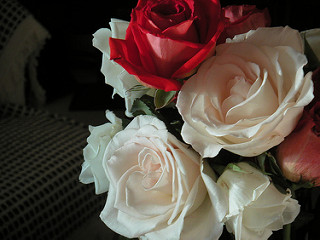

In [14]:
PIL.Image.open(str(roses[1]))

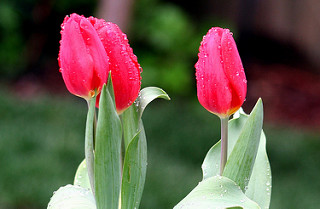

In [17]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# Read flowers images from disk into numpy array using opencv

In [25]:
# create class using dictionary

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [27]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [28]:
# assigning class number to each classes

flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [29]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [30]:
# cv2 is not accepting windows path so for that pupose we need to change it to str

str(flowers_images_dict['roses'][0])

# open cv expect that str path hence we've to change

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [32]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

# opencv just read the image from disk & converted into 3D numpy array 

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [33]:
img.shape

(240, 179, 3)

In [34]:
# dimension of images are not same so we've to resize it to some statndard size.
# so while training the model we've to make the dimensions same for all images.

cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [36]:
# now we are resizing all the images using loop
# initially get how much images are present of particular classes

for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [38]:
# now we are resizing all the images using loop
# to create X and y where X is all images and y is label for that particular image
# Ml expect all training samples to be same hence we've to resize it.

X,y = [],[]

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [39]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [40]:
y[:5] # first 5 images belonging to roses as label for roses is 0

[0, 0, 0, 0, 0]

In [41]:
X = np.array(X)
y = np.array(y)

# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Preprocessing = Scale images

In [43]:
# scale
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [44]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

# Building covolutional neural network and train it

In [46]:
# build model
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), # 16 filter & 3*3 matrix
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), # dense layer accept 1D array hence we've to flatten
        layers.Dense(128, activation = 'relu'),
        layers.Dense(num_classes)  # it use linear activation
    
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy']),

model.fit(X_train_scaled, y_train, epochs= 30)

Epoch 1/30
86/86 [==============================] - 48s 533ms/step - loss: 1.3538 - accuracy: 0.4186
Epoch 2/30
86/86 [==============================] - 44s 513ms/step - loss: 0.9958 - accuracy: 0.6043
Epoch 3/30
86/86 [==============================] - 44s 515ms/step - loss: 0.8157 - accuracy: 0.6900
Epoch 4/30
86/86 [==============================] - 45s 517ms/step - loss: 0.6463 - accuracy: 0.7544
Epoch 5/30
86/86 [==============================] - 44s 514ms/step - loss: 0.4493 - accuracy: 0.8387
Epoch 6/30
86/86 [==============================] - 44s 514ms/step - loss: 0.2577 - accuracy: 0.9153
Epoch 7/30
86/86 [==============================] - 52s 607ms/step - loss: 0.1636 - accuracy: 0.9484
Epoch 8/30
86/86 [==============================] - 54s 632ms/step - loss: 0.0972 - accuracy: 0.9720
Epoch 9/30
86/86 [==============================] - 55s 634ms/step - loss: 0.0397 - accuracy: 0.9916
Epoch 10/30
86/86 [==============================] - 45s 529ms/step - loss: 0.0371 - accura

In [47]:
model.evaluate(X_test_scaled, y_test) 

29/29 [==============================] - 6s 176ms/step - loss: 2.1309 - accuracy: 0.6710


[2.130920171737671, 0.671023964881897]

###### Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (67.17%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [48]:
predictions = model.predict(X_test_scaled) 
predictions # due to linear activation the output look like this

29/29 [==============================] - 5s 159ms/step


array([[  2.01347   ,  16.069506  ,  -6.54676   , -18.324747  ,
        -15.451584  ],
       [  6.3319583 ,  -4.0656633 , -12.19442   ,  -5.849937  ,
          3.808257  ],
       [ -4.414446  ,  -3.9020236 ,  12.067406  ,  -8.471575  ,
         -5.2652154 ],
       ...,
       [  1.9393283 ,  -5.429915  , -17.07689   ,   5.318788  ,
          9.376291  ],
       [  1.8301173 ,  -1.4466342 , -10.961993  ,  -9.5024605 ,
          0.25045273],
       [  0.70324266, -17.863338  ,   2.8827744 ,   7.5915947 ,
          7.3355136 ]], dtype=float32)

In [49]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([7.8621395e-07, 9.9999917e-01, 1.5061909e-10, 1.1554880e-15,
       2.0443930e-14], dtype=float32)>

In [50]:
np.argmax([0,78,123,8]) # here is a sample that how argmax function works

2

In [51]:
np.argmax(score)

1

In [52]:
y_test[0]

1

In [53]:
# for 1st test sample it predicts right but still we've less accuracy on test 
# so we can use data augmentation to address this overfitting

## Improve test accuracy using Data Augmentation

In [59]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

# for data augmentation there are lot of changes to do like
'''tf.keras.layers.Resizing, 
tf.keras.layers.Rescaling, 
tf.keras.layers.RandomFlip, 
and tf.keras.layers.RandomRotation'''

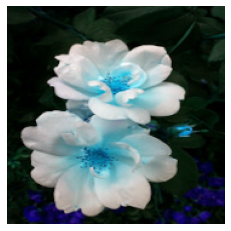

In [60]:
plt.axis('off') # to remove axis
plt.imshow(X[0])

In [61]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[  0.8994267 ,   2.7502522 ,   0.31713295],
        [  1.3657341 ,   3.        ,   1.        ],
        [  1.3657341 ,   3.        ,   1.        ],
        ...,
        [  3.7314682 ,  10.161108  ,   6.961004  ],
        [  3.1399102 ,  11.29356   ,   3.1707492 ],
        [  2.0673816 ,  12.3171425 ,   0.7502488 ]],

       [[  0.97899973,   4.8463573 ,   0.529897  ],
        [  0.24331774,   3.4866354 ,   0.41825485],
        [  0.        ,   3.        ,   0.41825485],
        ...,
        [  1.4029856 ,  13.068691  ,   7.3548985 ],
        [  1.0114522 ,  11.688311  ,   1.5817413 ],
        [  3.3139067 ,  13.682877  ,   1.6828766 ]],

       [[  1.9512755 ,   5.9512753 ,   0.95127547],
        [  1.2646141 ,   5.1752343 ,   0.35399386],
        [  0.13003527,   3.9763944 ,   0.        ],
        ...,
        [  4.101761  ,  20.203522  ,  11.309952  ],
        [  1.7569801 ,  14.0337105 ,   3.4128249 ],
        [  3.31703

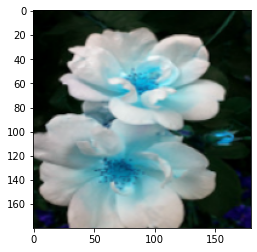

In [63]:
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

## Improve test accuracy using Data Augmentation

In [70]:
# so we build a model using data augmentation to create more sample 
# make our model more robust
# it can generalise well doesn't overfit
img_height = 180
img_width = 180

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape = (img_height,
                                                              img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])





###### Original image

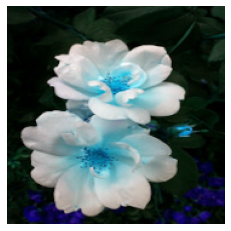

In [71]:
plt.axis('off')
plt.imshow(X[0])

###### Image generated using data augmentation

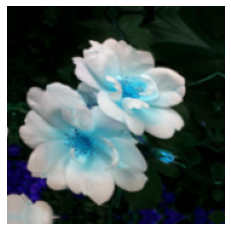

In [72]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Build a model using Data Augmentation

In [73]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 59s 633ms/step - loss: 1.2640 - accuracy: 0.4342
Epoch 2/30
86/86 [==============================] - 52s 602ms/step - loss: 1.0251 - accuracy: 0.5865
Epoch 3/30
86/86 [==============================] - 52s 606ms/step - loss: 0.9045 - accuracy: 0.6461
Epoch 4/30
86/86 [==============================] - 52s 604ms/step - loss: 0.8278 - accuracy: 0.6784
Epoch 5/30
86/86 [==============================] - 50s 577ms/step - loss: 0.7780 - accuracy: 0.6919
Epoch 6/30
86/86 [==============================] - 51s 591ms/step - loss: 0.7356 - accuracy: 0.7217
Epoch 7/30
86/86 [==============================] - 53s 618ms/step - loss: 0.6945 - accuracy: 0.7260
Epoch 8/30
86/86 [==============================] - 54s 631ms/step - loss: 0.6923 - accuracy: 0.7376
Epoch 9/30
86/86 [==============================] - 52s 608ms/step - loss: 0.6721 - accuracy: 0.7438
Epoch 10/30
86/86 [==============================] - 51s 592ms/step - loss: 0.6514 - accura

In [74]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 158ms/step - loss: 1.0352 - accuracy: 0.7364


[1.035225510597229, 0.7363834381103516]

#### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.63%